# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import seaborn as sns

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
    - y = 3.19822851 * x + 0.8379868943458518 
   
   b. Analyze prediction error distribution. What is an unbiased estimator?
      - The prediction error distribution looks normally distributed with expected value 0 and standard deviation around 4/3
      - An unbiased estimator is that the error distribution is centered around 0

---

In [5]:
%load_ext autoreload
%autoreload 2


In [6]:
# Import your implementation
from Linear_Regression import LinearRegression # <--- This is your implementation
from Logistic_Regression import LogisticRegression

In [7]:
# Data
data = pd.read_csv('mission1.csv')

In [8]:
from sklearn.model_selection import train_test_split

features = data['Net_Activity'].values.reshape(-1, 1)
target = data['Energy'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

Epoch 0: Loss 4542.493178044919
Epoch 100: Loss 5.836614846979263
Epoch 200: Loss 5.783876128321854
Epoch 300: Loss 5.7327080500204355
Epoch 400: Loss 5.683063835983553
Epoch 500: Loss 5.634898103183832
Epoch 600: Loss 5.58816682017047
Epoch 700: Loss 5.542827266817154
Epoch 800: Loss 5.4988379952687865
Epoch 900: Loss 5.456158792051294
Weights: [[3.19822851]]. Bias: 0.8379868943458518


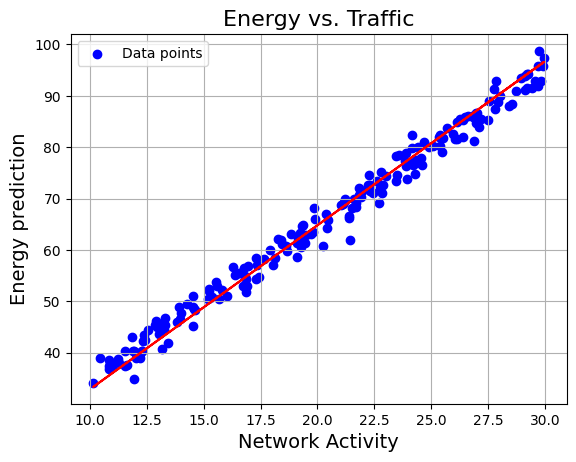

In [9]:

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


plt.scatter(X_test, y_test, c='blue', label='Data points')
plt.plot(X_test, y_pred, c='red')
plt.grid(True)
plt.legend()
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy prediction', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.show()


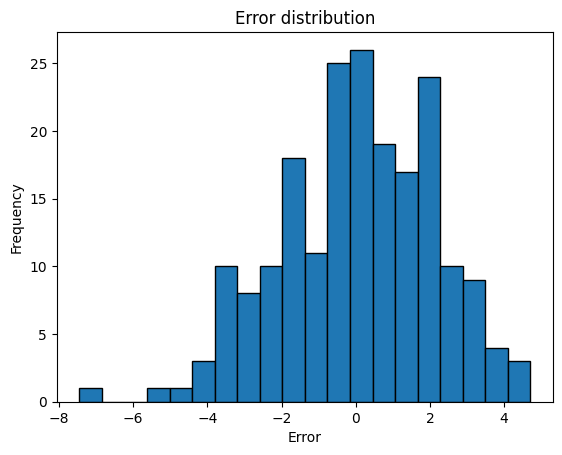

In [10]:
error = y_test - y_pred
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error distribution')
plt.show()


In [11]:
def accuracy(trueValues, predictions):
    return np.mean(trueValues == predictions)



## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   - The data was impossible to separate linearly, so I needed to flip the 3rd and 4th quadrant. 

   b. What is the model's inductive bias. Why is it important?
   - The models inductive bias is its initial assumptions. A starting point from the model to learn from

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   - Yes it can! This is because it is a classification-problem, and decisionTreeClassifier does exactly this. 
   
   d. Plot the ROC curve

---

In [12]:
data = pd.read_csv('mission2.csv')

train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train.loc[train['x1'] < 0, 'x0'] = -train['x0']
test.loc[test['x1'] < 0, 'x0'] = -test['x0']


X_train = train[['x0', 'x1']]
X_test = test[['x0', 'x1']]

# Transformere dataen for x1 < 0, med *(-1)



y_train = train['y']
y_test = test['y']


Epoch 0: LogLoss 0.6931471805599468
Epoch 100: LogLoss 0.3987955321234572
Epoch 200: LogLoss 0.36671770815749677
Epoch 300: LogLoss 0.35634706856699444
Epoch 400: LogLoss 0.35190668614641996
Epoch 500: LogLoss 0.3497368455056381
Epoch 600: LogLoss 0.34859270352463345
Epoch 700: LogLoss 0.34795937533954013
Epoch 800: LogLoss 0.3475970376924725
Epoch 900: LogLoss 0.34738483651192653
Accuracy:  0.946


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


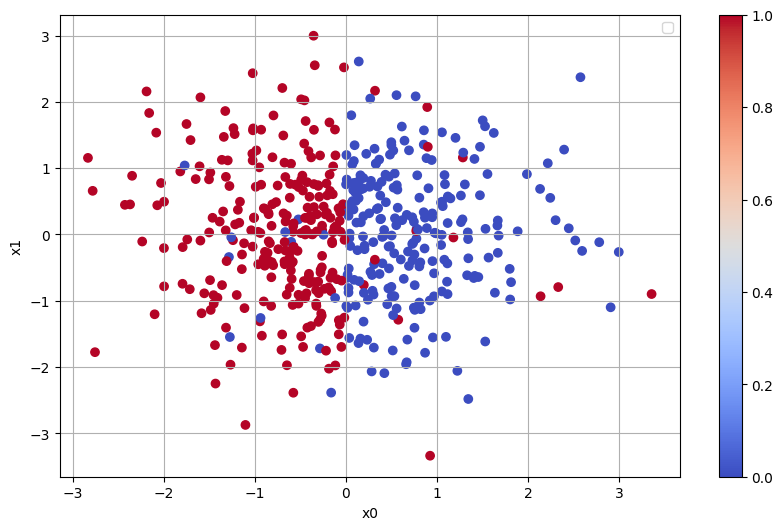

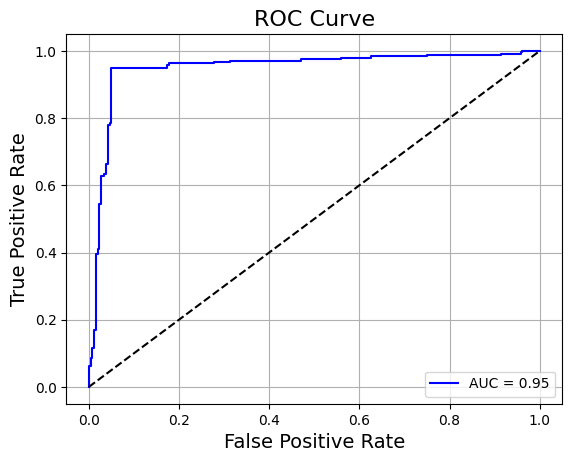

In [13]:
import sklearn.metrics as metrics

logr = LogisticRegression()

logr.fit(X_train, y_train)
pred = logr.predict(X_test)

print("Accuracy: ", accuracy(y_test, pred))
epoch_list = np.arange(0, 1000,1)

prob_predictions = logr.predictProba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions), 2)

plt.figure(figsize=(10, 6))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.colorbar()
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.grid()
plt.show()

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()


#### a) Poor initial preformance due to non-linear data. I needed to transform the data. Reflected the x0-values along the x < 0-axis
- The original scatter was divided into 4 sections along a curve A/x -> Not linear. This lead to only 49% of the data predicted correctly
-

#### b) 

0.878

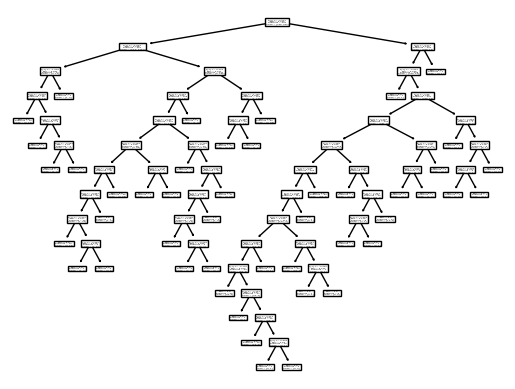

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predTree = clf.predict(X_test)
tree.plot_tree(clf)
accuracy(y_test, predTree)


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?
      - I used different gridSearches to find the optimal hyperparameters. To break the threshold I tried over- and undersampling, but the best was not to do any of them. Only the trick from blackboard with *1000 %2.

   b. Justify ROC AUC usage. Plot and interpret ROC.
    - ROC AUC is a performance metric used for evaluating binary classification models. It measures how well the model distinguishes between the positive and negative classes across all possible thresholds. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity), and the AUC quantifies the overall ability of the model to discriminate between classes, with a value ranging from 0 to 1. A higher AUC indicates a better-performing model, with an AUC of 1 representing perfect classification and 0.5 indicating no better than random guessing.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.
   - The results are the same

---

In [15]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

[[1594   20]
 [ 358   28]]
Accuracy: 0.811
ROC AUC Score: 0.72


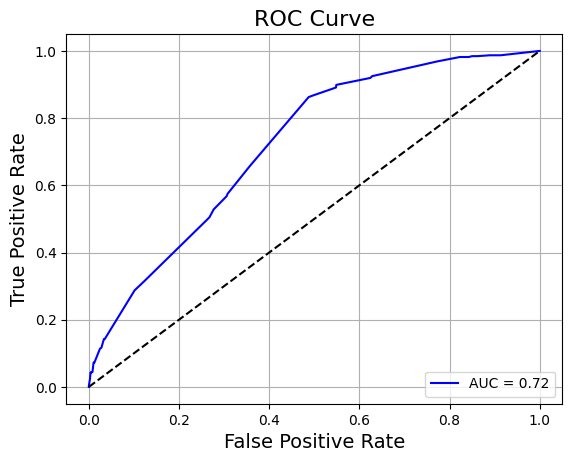

In [16]:
# Critical communication needs to be more important in dataset. 
# I need to over- or under- sample the data
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Modify data to fit the model correctly
train['data_stream_3'] = (train['data_stream_3'] * 1000 + 1) % 2
test['data_stream_3'] = (test['data_stream_3'] * 1000 + 1) % 2

# Check the ratio between the majority and minority
ratioMajMin = train['target'].sum() / len(train['target'])
# print(ratioMajMin)


### Over- and Undersampling

majorityClass = 0
minorityClass = 1

trainMajority = train[train['target'] == majorityClass]
trainMinority = train[train['target'] == minorityClass]
nSamplesNeeded = len(trainMajority) - len(trainMinority)

# Undersampling
trainMajorityUndersampled = trainMajority.sample(n=len(trainMinority), random_state=43)
trainBalancedUndersampled = pd.concat([trainMinority, trainMajorityUndersampled])

# Oversampling
trainMinorityOversampled = trainMinority.sample(n=nSamplesNeeded, replace=True, random_state=42)
trainBalancedOversampled = pd.concat([trainMajority, trainMinorityOversampled])

### End over-under-sampling

# Functions to test ROC-curve
y_train = train['target']
X_train = train.drop(columns=['target'])
y_test = test['target']
X_test = test.drop(columns=['target'])


'''
param_grid = {
    'max_depth': [5,10,25,None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}

clf = tree.DecisionTreeClassifier(random_state=42)
gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=1, verbose=1)
gridSearch.fit(X_train, y_train)
bestParams = gridSearch.best_params_
bestScore = gridSearch.best_score_
print(f"Best parameters found: {bestParams}")
print(gridSearch.cv_results_)
best_model = gridSearch.best_score_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {roc_auc:.2f}")
print(f"Best ROC-auc Score: {bestScore}")

'''

# After doing a grid search CV i found 
# Best parameters found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=6, 
                                  min_samples_leaf=2, 
                                  min_samples_split=2,
                                  random_state=50, 
                                  )

clf.fit(X_train, y_train)
clfPred = clf.predict(X_test)

cm = confusion_matrix(y_test, clfPred)
print(cm)

print(f'Accuracy: {accuracy(y_test, clfPred)}')

prob_predictions = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions), 2)
print(f'ROC AUC Score: {auc}')

# cross_val_auc = cross_val_score(clf, X_test, y_test, cv=5, scoring='roc_auc')
# print(f'Cross-validated AUC: {round(cross_val_auc.mean(), 2)}')

#tree.plot_tree(clf)

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()



Accuracy: 0.807
ROC AUC Score: 0.72
Cross-validated AUC: 0.72


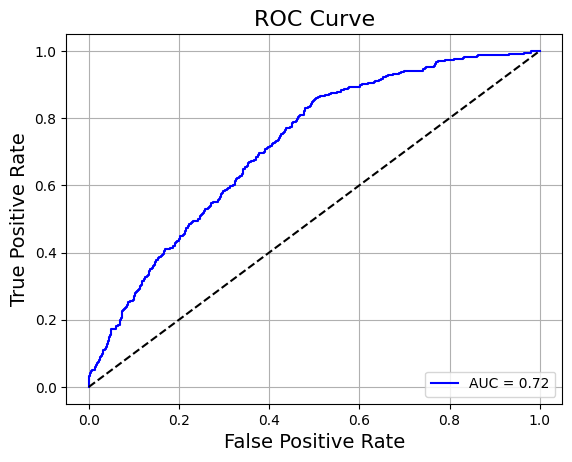

In [17]:
from sklearn.ensemble import RandomForestClassifier

clfF = RandomForestClassifier(max_depth=5, random_state=0)

clfF.fit(X_train, y_train)
forestPredict = clfF.predict(X_test)

print(f'Accuracy: {accuracy(y_test, forestPredict)}')

prob_predictionsF = clfF.predict_proba(X_test)[:, 1]
fprF, tprF, thresholdsF = metrics.roc_curve(y_test, prob_predictionsF, pos_label=1)
aucF = round(metrics.roc_auc_score(y_test, prob_predictionsF), 2)
print(f'ROC AUC Score: {aucF}')

cross_val_aucF = cross_val_score(clfF, X_test, y_test, cv=5, scoring='roc_auc')
print(f'Cross-validated AUC: {round(cross_val_aucF.mean(), 2)}')

plt.plot(fprF, tprF, color='blue', label=f'AUC = {aucF}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()



## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy
   - I fixed the colums. I reordered the data so it was categorized correctly. I also fiiled the NaN-values with the median of the other values to get at better prediction.

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?
   - RMSLE is used for regression tasks with skewed distributions, as it penalizes underestimations more and reduces the impact of large outliers. It takes the logarithm of predictions and actual values, making it robust to data with wide value ranges. Unlike RMSLE, log_loss is used for binary classification, comparing predicted probabilities to actual outcomes.

   c. Plot and interpret feature importances
   - I used a heatmap for correlations between the differet data. core_reactor_size and grid_connections were the most important for the nexus_rating, but core_reactor size had many NaN-values so grid_connections were the most important.

   d. Describe your ensembling techniques
   - I used RandomForestRegressor which is an ensambler. Divided into n=1000 iterations.

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 
   - I would use an ensambler on the training-data to ensure better predictions later on.

---

In [70]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [71]:
nexusRating = test['grid_connections']
ownershipType = test['ownership_type']

# Shift all columns one index to the right
test = test.shift(1, axis=1)

# Fill the first column with the ownership type
test.iloc[:, 0] = ownershipType

# Fill the second column with nexus_rating
test.iloc[:, 1] = nexusRating

X_train = train.drop('nexus_rating', axis=1)
X_test = test.drop('nexus_rating', axis=1)


y_train = train['nexus_rating']
y_test = test['nexus_rating']

y_train = np.log1p(y_train)

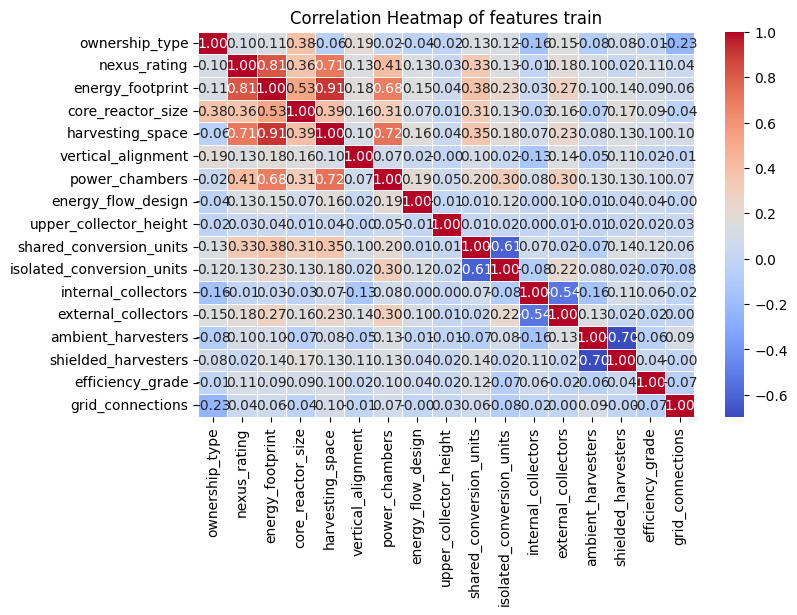

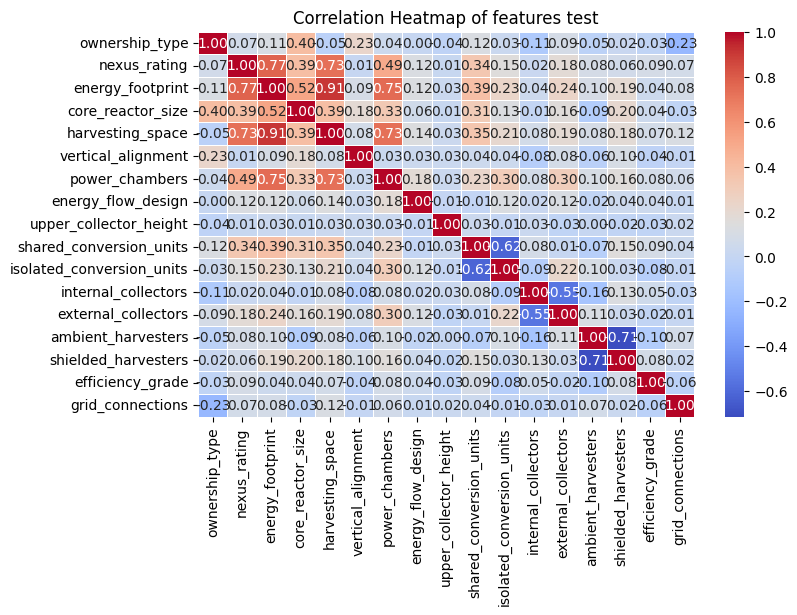

In [72]:
correlation_matrix = train.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of features train")
plt.show()

correlation_matrix_test = test.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of features test")
plt.show()

In [73]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [80]:

from catboost import CatBoostRegressor

# Only CatBoostRegressor
cbr2 = CatBoostRegressor(iterations=1000, learning_rate=0.055, depth=10, random_seed=46)
cbr2.fit(X_train, y_train)
cbr2_pred = cbr2.predict(X_test)
cbr2_pred = np.expm1(cbr2_pred)

#pred = rfr.predict(test_filled.drop('nexus_rating', axis=1))
print('RMSLE: ', rmsle(y_test, cbr2_pred))
print('Required RMSLE: ', 0.294)

0:	learn: 0.8280832	total: 14.7ms	remaining: 14.7s
1:	learn: 0.7950232	total: 27.8ms	remaining: 13.9s
2:	learn: 0.7639720	total: 40ms	remaining: 13.3s
3:	learn: 0.7345447	total: 52.2ms	remaining: 13s
4:	learn: 0.7067841	total: 63.3ms	remaining: 12.6s
5:	learn: 0.6808431	total: 77.4ms	remaining: 12.8s
6:	learn: 0.6570131	total: 97.3ms	remaining: 13.8s
7:	learn: 0.6346641	total: 114ms	remaining: 14.1s
8:	learn: 0.6124225	total: 125ms	remaining: 13.7s
9:	learn: 0.5920349	total: 137ms	remaining: 13.5s
10:	learn: 0.5732349	total: 147ms	remaining: 13.3s
11:	learn: 0.5556085	total: 158ms	remaining: 13s
12:	learn: 0.5400361	total: 168ms	remaining: 12.8s
13:	learn: 0.5249039	total: 180ms	remaining: 12.7s
14:	learn: 0.5104295	total: 193ms	remaining: 12.7s
15:	learn: 0.4966595	total: 204ms	remaining: 12.5s
16:	learn: 0.4840189	total: 216ms	remaining: 12.5s
17:	learn: 0.4717522	total: 231ms	remaining: 12.6s
18:	learn: 0.4607112	total: 243ms	remaining: 12.5s
19:	learn: 0.4508079	total: 255ms	remain